In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

import kraft

In [3]:
n_gene = 10

genes = pd.Index(("Gene{}".format(i) for i in range(n_gene)), name="Gene")

genes

Index(['Gene0', 'Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6', 'Gene7',
       'Gene8', 'Gene9'],
      dtype='object', name='Gene')

In [4]:
n_sample = 6

samples = pd.Index(("Sample{}".format(i) for i in range(n_sample)), name="Sample")

samples

Index(['Sample0', 'Sample1', 'Sample2', 'Sample3', 'Sample4', 'Sample5'], dtype='object', name='Sample')

In [5]:
gene_x_sample = pd.DataFrame(
    np.random.normal(size=(n_gene, np.size(samples))),
    index=genes,
    columns=samples,
)

gene_x_sample

Sample,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5
Gene,,,,,,
Gene0,-0.537755,0.898227,1.055616,-1.913890,-0.264660,0.525361
Gene1,-1.723246,-0.472094,2.193093,0.286703,-0.590919,0.243358
Gene2,1.342044,-1.232200,-1.227862,0.694514,-0.383107,-0.721117
Gene3,-0.601187,-0.963711,0.281907,1.007017,0.383391,-1.195696
Gene4,0.064635,-0.590977,1.413777,-1.096292,-0.467940,-0.074293
Gene5,0.827318,0.210434,-0.418224,0.065311,-0.119610,-0.152671
Gene6,-0.426779,0.353504,0.379629,-0.363438,0.260084,-0.134865
Gene7,-0.167897,-0.794480,-0.007388,-1.124184,0.629827,2.122736
Gene8,-0.421789,-0.699395,-0.488534,0.152751,0.904025,-0.401932


In [6]:
n_sample_per_group = gene_x_sample.shape[1] // 2

phenotype = pd.Series(
    (0,) * n_sample_per_group + (1,) * n_sample_per_group,
    index=gene_x_sample.columns,
    name="Phenotype",
)

phenotype

Sample
Sample0    0
Sample1    0
Sample2    0
Sample3    1
Sample4    1
Sample5    1
Name: Phenotype, dtype: int64

In [7]:
gene_set_genes = {
    # "GeneSet0": ["Gene0"],
    "GeneSet1": ["Gene1", "Gene2"],
    "GeneSet2": ["Gene3", "Gene4", "Gene5"],
    "GeneSet3": ["Gene6", "Gene7", "Gene8", "Gene9"],
}

## Score and enrich

In [8]:
def compare_phenotype_and_expression(phenotype, expression):

    return expression[phenotype == 1].mean() - expression[phenotype == 0].mean()

vector.index (6) and matrix.columns (6) share 6.
Computing statistics using 1 process...


/Users/kwatme/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

Mean of empty slice.

/Users/kwatme/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Scoring...
Computing 0.95 margin of error with 10 sampling...
Computing p-value and false discovery rate with 10 permutation...
Plotting...


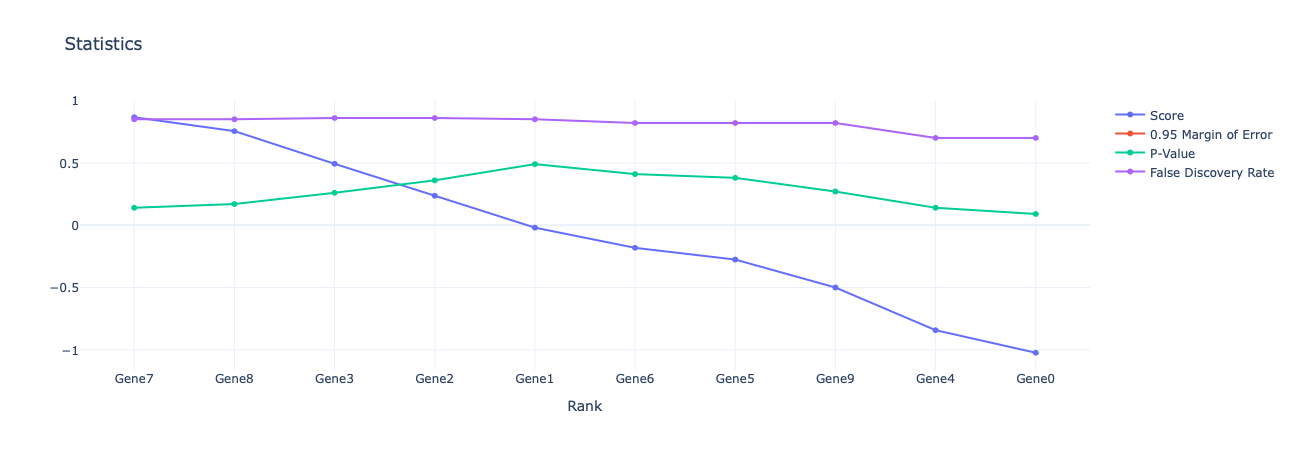

Clustering within category...


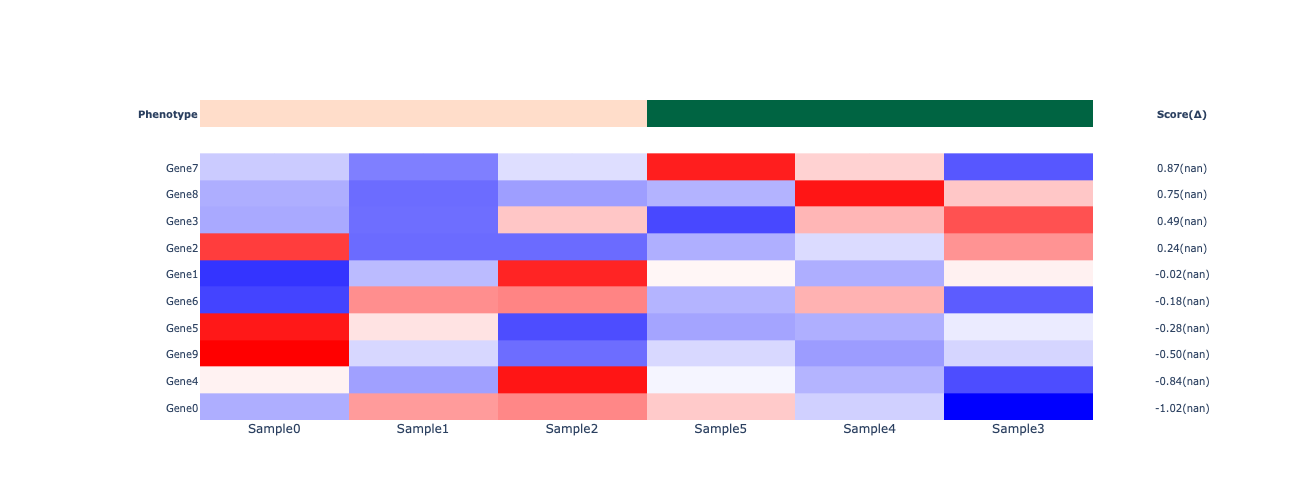

In [9]:
gene_x_statistic = kraft.apply_function_on_vector_and_matrix_row(
    phenotype, gene_x_sample, function=compare_phenotype_and_expression, n_sampling=10, n_permutation=10, series_data_type="binary"
)

In [10]:
gene_score = gene_x_statistic["Score"]

gene_score

Gene
Gene7    0.866048
Gene8    0.754854
Gene3    0.492567
Gene2    0.236102
Gene1   -0.019537
Gene6   -0.181524
Gene5   -0.275499
Gene9   -0.499805
Gene4   -0.841987
Gene0   -1.023092
Name: Score, dtype: float64

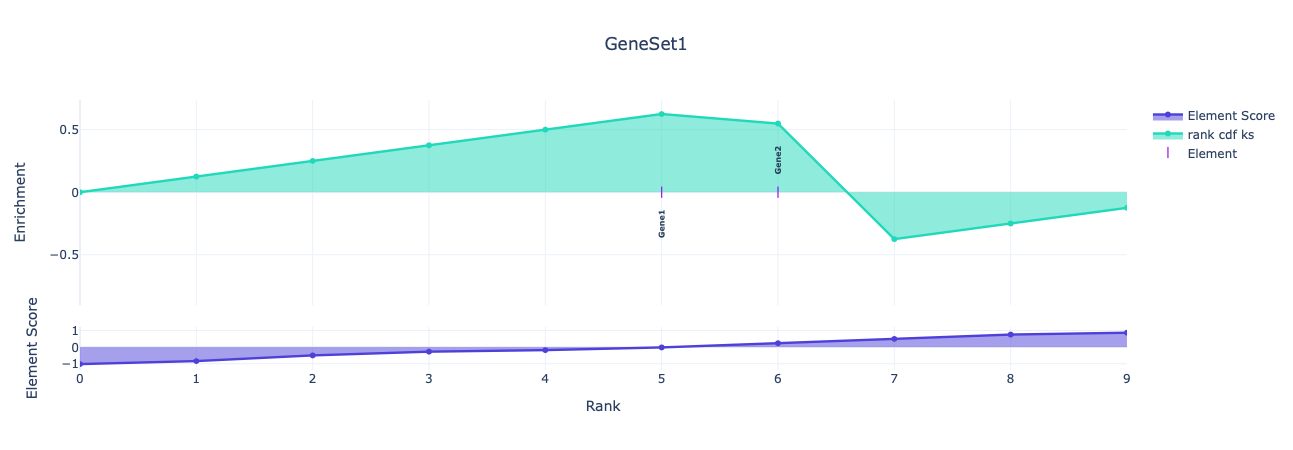

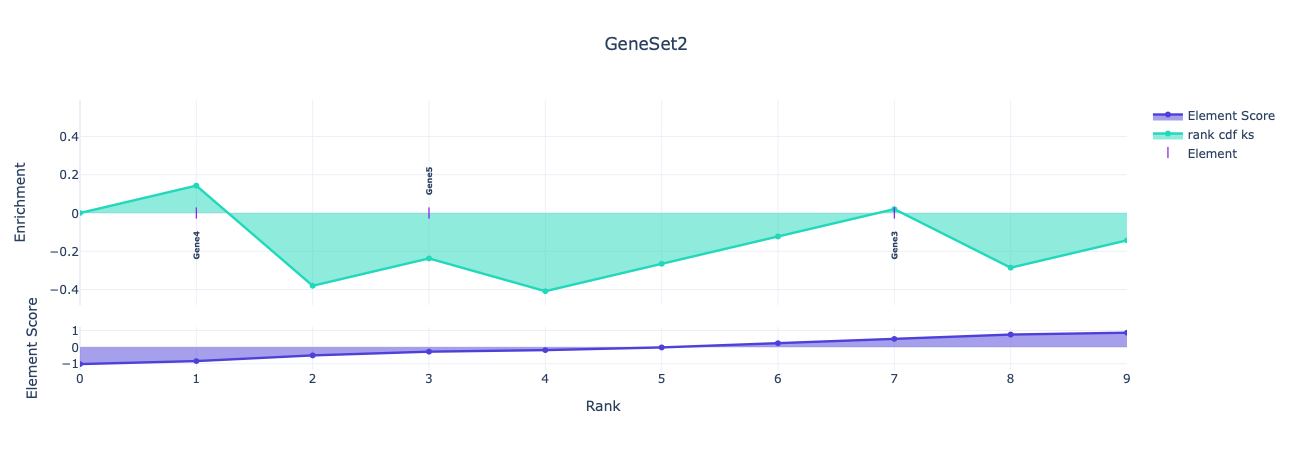

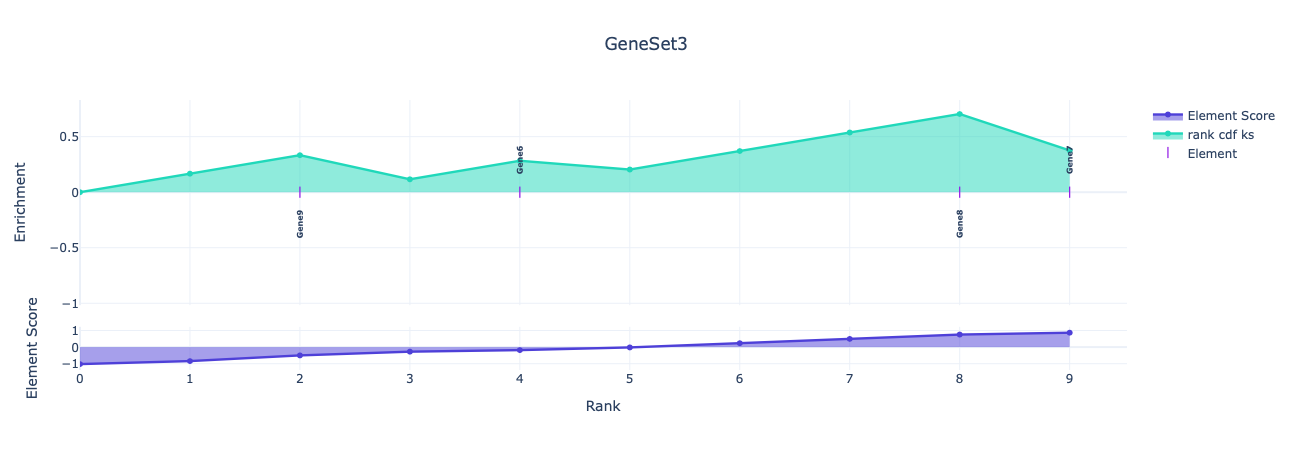

In [11]:
for gene_set in gene_set_genes:

    kraft.compute_set_enrichment(
        gene_score, gene_set_genes[gene_set], title=gene_set,
    )

## Enrich and score

In [12]:
gene_set_x_sample = np.full((len(gene_set_genes), len(gene_x_sample.columns)), np.nan)

gene_set_x_sample

array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan]])

In [13]:
for row_i, (gene_set, gene_set_genes_) in enumerate(gene_set_genes.items()):

    print(gene_set)

    for column_i, (sample, gene_score) in enumerate(gene_x_sample.items()):

        print(sample)

        gene_set_x_sample[row_i, column_i] = kraft.compute_set_enrichment(
            gene_score, gene_set_genes_, plot=False
        )

GeneSet1
Sample0
Sample1
Sample2
Sample3
Sample4
Sample5
GeneSet2
Sample0
Sample1
Sample2
Sample3
Sample4
Sample5
GeneSet3
Sample0
Sample1
Sample2
Sample3
Sample4
Sample5


In [14]:
gene_set_x_sample = pd.DataFrame(
    gene_set_x_sample, index=gene_set_genes.keys(), columns=gene_x_sample.columns
)

gene_set_x_sample

Sample,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5
GeneSet1,-0.562180,-0.722997,0.641076,0.875000,-0.750000,-0.622679
GeneSet2,0.311653,-0.452211,0.525940,0.464358,-0.339087,-0.840465
GeneSet3,0.622295,-0.433620,-0.593689,-0.579606,0.681418,0.771090


vector.index (6) and matrix.columns (6) share 6.
Computing statistics using 1 process...


/Users/kwatme/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

Mean of empty slice.

/Users/kwatme/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Scoring...
Computing 0.95 margin of error with 10 sampling...
Computing p-value and false discovery rate with 10 permutation...
Plotting...


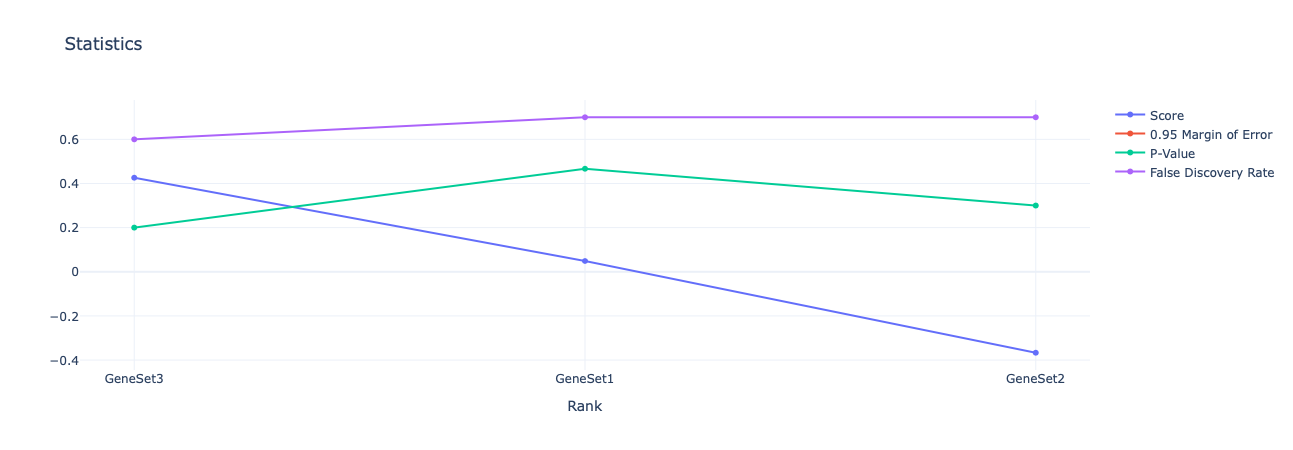

Clustering within category...


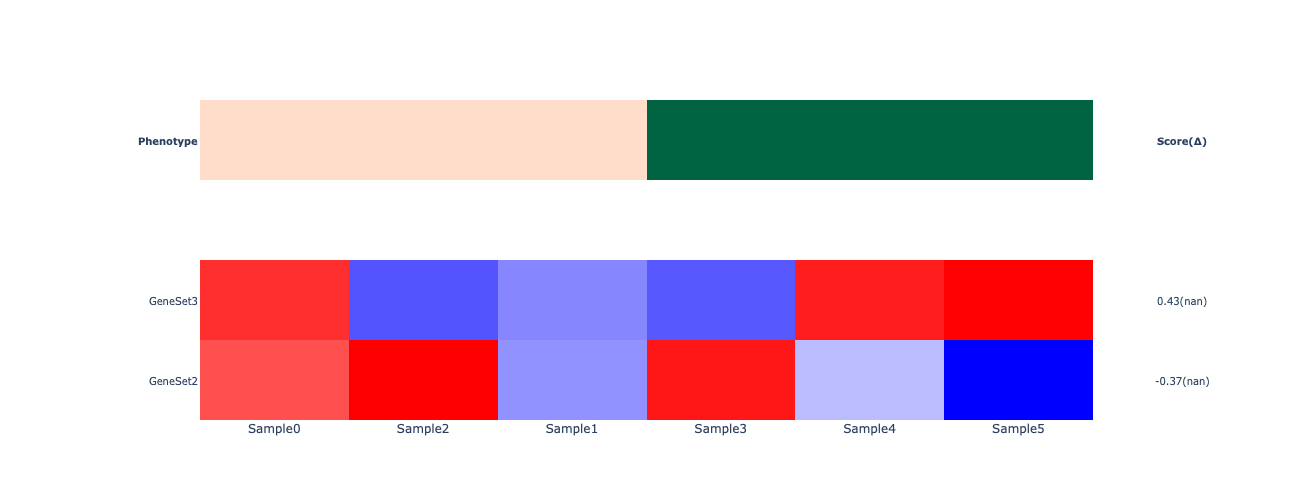

,Score,0.95 Margin of Error,P-Value,False Discovery Rate
GeneSet3,0.425972,NaN,0.200000,0.6
GeneSet1,0.048808,NaN,0.466667,0.7
GeneSet2,-0.366859,NaN,0.300000,0.7


In [16]:
gene_set_x_statistic = kraft.apply_function_on_vector_and_matrix_row(
    phenotype, gene_set_x_sample, function=compare_phenotype_and_expression, series_data_type="binary",
)

gene_set_x_statistic